# Titanic linear regression tensorflow trainer

This is example will load, parse, clean and convert titanic data set and then train simple linear regression on it with tensorflow framework

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_ml import ConfusionMatrix

dr = pd.read_csv('../data/titanic/train.csv')

dr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
dr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


See coorelation between features


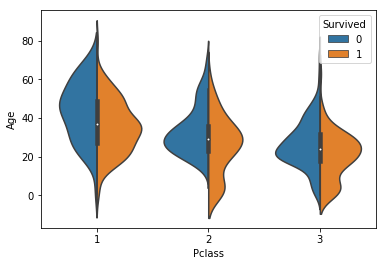

In [77]:
print 'See coorelation between features'
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=dr, split=True)

First class passagers look older than the rest and have very few childrens with them

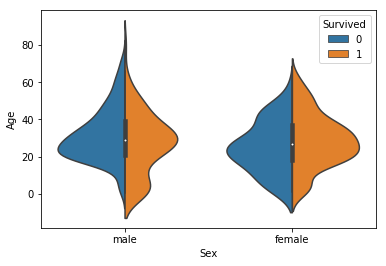

In [78]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=dr, split=True)

For boys (young males) the disproportion between death and survival shows the age was factor

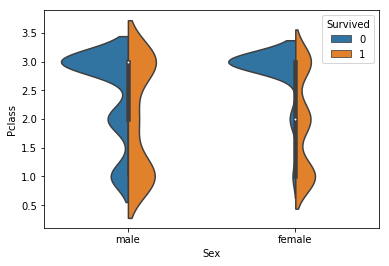

In [79]:
sns.violinplot(x='Sex', y='Pclass', hue='Survived', data=dr, split=True)

Clearly the ticket class had big survivability impact as many 3rd class passangers died compared to other classes

In [80]:
print 'Shape=', dr.shape

print 'Expand Pclass to one-hot'
dr = pd.concat([dr, pd.get_dummies(dr['Pclass'], prefix='Class')], axis=1)

print 'Shape=', dr.shape
dr.head()

Shape= (891, 12)
Expand Pclass to one-hot
Shape= (891, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [81]:
print 'Shape=', dr.shape

print 'Remove undesired columns'
dr = dr.drop( [ 'PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked' ], axis=1)

print 'Remove rows which contain invalid data'
for row in [ 'Age', 'Survived', 'Sex' ]:
    dr = dr[pd.notnull(dr[row])]


print 'Shape=', dr.shape
dr.head()

Shape= (891, 15)
Remove undesired columns
Remove rows which contain invalid data
Shape= (714, 6)


,Survived,Sex,Age,Class_1,Class_2,Class_3
0,0,male,22.0,0,0,1
1,1,female,38.0,1,0,0
2,1,female,26.0,0,0,1
3,1,female,35.0,1,0,0
4,0,male,35.0,0,0,1


In [82]:
print 'Normalizing age'

maximum_age = dr['Age'].max()
dr['Age'] = dr['Age'] / dr['Age'].max()
dr.head()

print 'Now age 1.0 means', maximum_age, 'years old'

Normalizing age
Now age 1.0 means 80.0 years old


In [83]:
print 'Converting sex into int'

dr['Sex'] = dr['Sex'].apply( lambda x: int(x == 'female' or x == 1))
dr.head()

Converting sex into int


,Survived,Sex,Age,Class_1,Class_2,Class_3
0,0,0,0.2750,0,0,1
1,1,1,0.4750,1,0,0
2,1,1,0.3250,0,0,1
3,1,1,0.4375,1,0,0
4,0,0,0.4375,0,0,1


In [84]:
print 'Save pre-processed dataset'

np.savetxt('../out/titanic.formated-data.csv', dr, delimiter=',', fmt='%f') 

print 'Save H file with the intended structure'
with open('../out/titanic-data.h', 'w') as fh:
    fh.write('#ifndef TITANIC_STRUCTURE_H\n')
    fh.write('#define TITANIC_STRUCTURE_H\n')
    fh.write('\n')
    fh.write('struct titanic_entry {\n')
    fh.write('  uint8_t survived;\n')
    fh.write('  uint8_t sex;\n')
    fh.write('  float   age;\n')
    fh.write('  uint8_t class1;\n')
    fh.write('  uint8_t class2;\n')
    fh.write('  uint8_t class3;\n')
    fh.write('};\n')
    fh.write('\n')
    fh.write('extern const struct titanic_entry titanic_data[];\n')
    fh.write('\n')
    fh.write('#endif\n')
    fh.close()
  
print 'Save C file populating titanic data structure'
with open('../out/titanic-data.c', 'w') as fh:
    fh.write('#include "titranic-data.h"\n')
    fh.write('\n')
    fh.write('// Sourced from: https://www.kaggle.com/c/titanic/data\n')
    fh.write('// Parsed, cleaned, converted, normalized and auto-generated by:\n')
    fh.write('//   https://github.com/truhlikfredy/machine-learning-experiments/blob/master/src/titanic-mk2.ipynb\n')
    fh.write('// \n')
    fh.write('// age is normalize and 1.0 means ' + str(maximum_age) + ' years old\n')
    fh.write('// sex 0=male and 1=female\n')
    fh.write('// class1-3 is one-hot clasifier what ticket class the passager had\n')
    fh.write('\n')
    fh.write('const struct titanic_entry titanic_data[] = {\n')
    for index, entry in dr.iterrows():
        fh.write('  { .survived = ' + str(int(entry['Survived'])) + ', .sex = ' + str(int(entry['Sex'])) + ', .age = ' + str(entry['Age']) + 'f')
        fh.write(', .class1 = ' + str(int(entry['Class_1'])))
        fh.write(', .class2 = ' + str(int(entry['Class_2'])))
        fh.write(', .class3 = ' + str(int(entry['Class_3'])))
        fh.write(' },\n')
    fh.write('};\n')
    fh.close()


Save pre-processed dataset
Save H file with the intended structure
Save C file populating titanic data structure


## Corelation between the features

See if there how strong coorelation is between the features


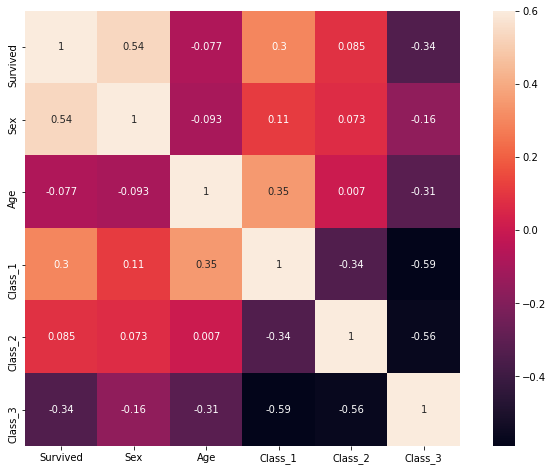

In [13]:
print 'See if there how strong coorelation is between the features'
plt.figure(figsize=[12,8])
sns.heatmap(dr.corr(), vmax=0.6, square=True, annot=True)

Correlations between the features is pretty strong, sex and class having significant impact on survivability

In [14]:
print 'Splitting raw data to train and verify sets'

dt, dv = train_test_split(dr, test_size=0.2)
print 'Train size=', len(dt)
print 'Verify size=', len(dv)

Splitting raw data to train and verify sets
Train size= 571
Verify size= 143


In [15]:
print 'Splitting train/verify data to input and expected values'

dty = dt['Survived']
dtx = dt.drop('Survived', axis=1)

dvy = dv['Survived']
dvx = dv.drop('Survived', axis=1)

print 'Train data X shape', dtx.shape
print 'Train data Y:'
dty.head()

Splitting train/verify data to input and expected values
Train data X shape (571, 5)
Train data Y:


352    0
120    0
476    0
372    0
91     0
Name: Survived, dtype: int64

In [16]:
print 'Converting from panda dataframe to regular python list and dropping the index column'

#[1:] will drop the first one which is the id/index column
ddtx = [x[1:] for x in dtx.itertuples()]
ddty = [y[1:] for y in dty.iteritems()]

ddvx = [x[1:] for x in dvx.itertuples()]
ddvy = [y[1:] for y in dvy.iteritems()]

print 'Size of X/Y of train data', len(ddtx), len(ddty)
print 'Size of X/Y of train data', len(ddvx), len(ddvy)
#print ddtx, ddty
print ddty[:10]

Converting from panda dataframe to regular python list and dropping the index column
Size of X/Y of train data 571 571
Size of X/Y of train data 143 143
[(0,), (0,), (0,), (0,), (0,), (1,), (1,), (1,), (0,), (1,)]


In [17]:
print 'Data preparation done'

Data preparation done


# Data preparation done, let's prepare for training

In [96]:
print 'Preparing for the training phase:'
features = dtx.shape[1] # how many different features the input data has

X = tf.placeholder("float", shape=[None, features], name="x")  # this way I can feed it one input, or whole array of inputs and everything will work as expected
Y = tf.placeholder("float", shape=[None, 1], name="y")

# 5 by 1 tensors
w = tf.Variable(tf.random_normal([features, 1], stddev=0.4), name="weight")
b = tf.Variable(tf.random_normal([1, features], stddev=0.3), name="bias")

train_samples        = dtx.shape[0]
verification_samples = dvx.shape[0]
# sigmoid predictor was not giving good results
pred                 = tf.reduce_sum(tf.add(tf.matmul(X,w), b), axis=1) # axis=1 one will make sure only second dimensions will get reduced
#pred                 = tf.add(tf.matmul(X,w), b) # simpler predictor
#predTrivial          = tf.matmul(X,w) # even simpler predictor
pred_rounded         = tf.minimum(tf.maximum(tf.round(pred),tf.constant(0.0)),tf.constant(1.0)) # will make sure it's not negarive or possitive (as sigmoid is not used, we need to protect it)
pred_compared        = tf.equal(pred_rounded, tf.reduce_sum(Y, axis=1))  # expected values Y are in 2D array [?,1] reduce it inot 1D array
accuracy             = tf.reduce_mean(tf.cast(pred_compared, tf.float32)) # get the mean of all expected and actual values
cost                 = tf.reduce_sum(tf.square(pred-tf.reduce_sum(Y, axis=1)))/(2*train_samples) # what is the reward/punisment
verification_cost    = tf.reduce_sum(tf.square(pred-tf.reduce_sum(Y, axis=1)))/(2*verification_samples) # separate, only for displaying data in the console
optimizer            = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # how the weights are trained and what metric will be minimalized by doing so
init                 = tf.global_variables_initializer()
print 'Done.'

Preparing for the training phase:
Done.


# Start training with tensorflow

In [53]:
print 'Training the weights:'

# initialize empty variables
visualize_x                 = []
visualize_cost              = []
visualize_verification_cost = []
visualize_acc               = []
visualize_verification_acc  = []

# train
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(0,200):
        # for each epoch train it first on the whole train set
        for (x, y) in zip(ddtx, ddty):
            sess.run(optimizer, feed_dict={X: [x], Y: [y]})
                
        # evaluate error for training / verification
        epoch_acc               = sess.run(accuracy,          feed_dict={X: ddvx, Y: ddvy})
        epoch_verification_acc  = sess.run(accuracy,          feed_dict={X: ddtx, Y: ddty})
        epoch_cost              = sess.run(cost,              feed_dict={X: ddtx, Y: ddty})
        epoch_verification_cost = sess.run(verification_cost, feed_dict={X: ddvx, Y: ddvy})

        #save valuse so they can be graphed into a plot later
        visualize_x.append(epoch);
        visualize_cost.append(epoch_cost);
        visualize_verification_cost.append(epoch_verification_cost);
        visualize_acc.append(epoch_acc);
        visualize_verification_acc.append(epoch_verification_acc);
                
        if (epoch%10 ==0):
            # print results only every 10 epochs
            print 'Epoch=', epoch, ' cost=', epoch_cost, ' verification_cost=', epoch_verification_cost, 'acc=', epoch_acc, 'acc_verfication=', epoch_verification_acc
            
    print 'prediction = round(reduce(input * weight + bias))'
    print 'weight=', sess.run(w)
    print 'bias=', sess.run(b)
    print
            
    # final preidctions for both train/verify sets
    train_predict  = sess.run(pred_rounded, feed_dict={X: ddtx})
    verify_predict = sess.run(pred_rounded, feed_dict={X: ddvx})

    print 'Saving trained w/b in tf format'
    tf.train.Saver([w, b]).save(sess, "../out/titanic.mk2.ckpt")

    print 'Saving trained w/b in plain-text format without scientific notation (forcing %f format)'
    w_val, b_val = sess.run([w, b])
    np.savetxt("../out/titanic.mk2-w.csv", w_val, delimiter=",", fmt='%f') 
    np.savetxt("../out/titanic.mk2-b.csv", b_val, delimiter=",", fmt='%f') 
    
    print "Confusion matrix:"
    print sess.run(tf.confusion_matrix(labels=ddvy, predictions=verify_predict, num_classes=2))

Training the weights:
Epoch= 0  cost= 1.7426562  verification_cost= 1.849557 acc= 0.37762237 acc_verfication= 0.41331
Epoch= 10  cost= 0.31603256  verification_cost= 0.31835216 acc= 0.3846154 acc_verfication= 0.40105078
Epoch= 20  cost= 0.18962033  verification_cost= 0.19182399 acc= 0.6013986 acc_verfication= 0.5323993
Epoch= 30  cost= 0.14439538  verification_cost= 0.14752606 acc= 0.6293706 acc_verfication= 0.6339755
Epoch= 40  cost= 0.12415626  verification_cost= 0.12761337 acc= 0.6433566 acc_verfication= 0.6900175
Epoch= 50  cost= 0.11379542  verification_cost= 0.1173745 acc= 0.6573427 acc_verfication= 0.7180385
Epoch= 60  cost= 0.10761926  verification_cost= 0.11126209 acc= 0.6503497 acc_verfication= 0.7285464
Epoch= 70  cost= 0.10334222  verification_cost= 0.107029855 acc= 0.6853147 acc_verfication= 0.73905426
Epoch= 80  cost= 0.10001728  verification_cost= 0.10373764 acc= 0.6853147 acc_verfication= 0.7548161
Epoch= 90  cost= 0.09723894  verification_cost= 0.100979164 acc= 0.69930

# Confusion matrix on verification data
Display all the true/false positives/negatives (TN, TP, FN, FP)

Visual confusion matrix:
Predicted  False  True  __all__
Actual                         
False         72    17       89
True          15    39       54
__all__       87    56      143


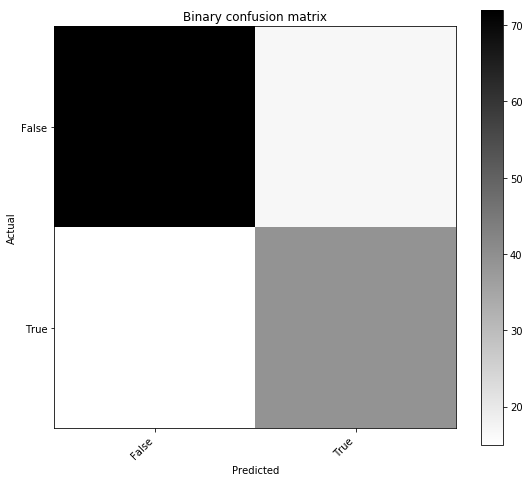

In [57]:
print 'Visual confusion matrix:'
confusion_matrix = ConfusionMatrix(np.add.reduce(ddvy, axis=1), verify_predict) # reduce was needed to get expected valuese from 2D to 1D
print confusion_matrix
confusion_matrix.plot()

In [87]:
confusion_matrix.stats()

OrderedDict([(u'population', 143),
             (u'P', 54),
             (u'N', 89),
             (u'PositiveTest', 56),
             (u'NegativeTest', 87),
             (u'TP', 39),
             (u'TN', 72),
             (u'FP', 17),
             (u'FN', 15),
             (u'TPR', 0.7222222222222222),
             (u'TNR', 0.8089887640449438),
             (u'PPV', 0.6964285714285714),
             (u'NPV', 0.8275862068965517),
             (u'FPR', 0.19101123595505617),
             (u'FDR', 0.30357142857142855),
             (u'FNR', 0.2777777777777778),
             (u'ACC', 0.7762237762237763),
             (u'F1_score', 0.7090909090909091),
             (u'MCC', 0.5276006133550823),
             (u'informedness', 0.5312109862671659),
             (u'markedness', 0.5240147783251232),
             (u'prevalence', 0.3776223776223776),
             (u'LRP', 3.781045751633987),
             (u'LRN', 0.3433641975308642),
             (u'DOR', 11.011764705882351),
             (u'FOR', 

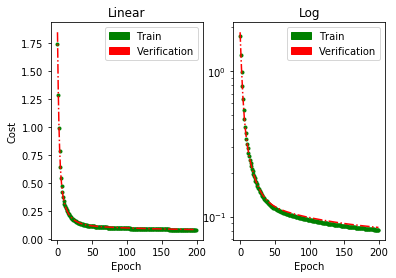

In [93]:
train_ver_handles = [mpatches.Patch(color='green', label='Train'), mpatches.Patch(color='red', label='Verification')]

f, sb = plt.subplots(1, 2)
sb[0].set_title('Linear')
sb[0].set_ylabel('Cost')
sb[0].set_xlabel('Epoch')
sb[0].plot(visualize_x, visualize_cost, "g.")
sb[0].plot(visualize_x, visualize_verification_cost, "r-.")
sb[0].legend(handles=train_ver_handles)

sb[1].set_title('Log')
sb[1].set_xlabel('Epoch')
sb[1].set_yscale('log')
sb[1].plot(visualize_x, visualize_cost, "g.")
sb[1].plot(visualize_x, visualize_verification_cost, "r-.")
sb[1].legend(handles=train_ver_handles)

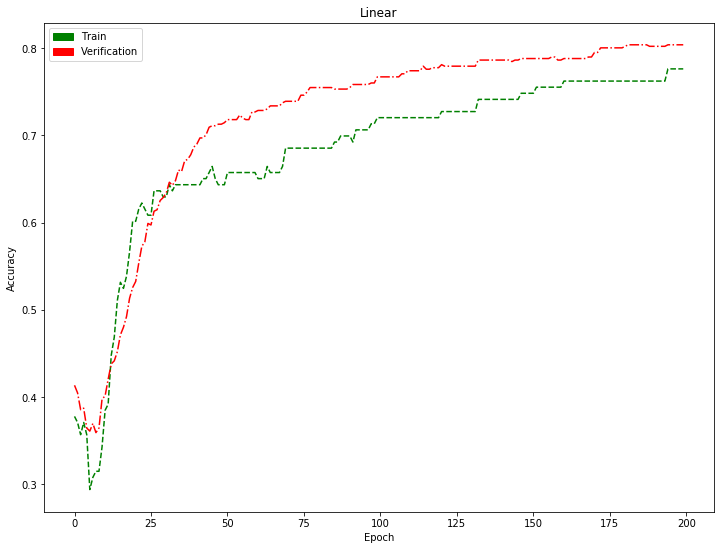

In [94]:
plt.figure(figsize=[12,9])
plt.title('Linear')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(visualize_x, visualize_acc, "g--")
plt.plot(visualize_x, visualize_verification_acc, "r-.")
plt.legend(handles=train_ver_handles)

In [86]:
print 'quick comparison between predicted and expected train/verify results'
print 'train set (actual and expected should match very well):'
print 'actual  =', train_predict[:15]
print 'expected=', np.add.reduce(ddty, axis=1, dtype=float)[:15]
print
print 'verify set (should match most of the time):'
print 'actual  =', verify_predict[:15]
print 'expected=', np.add.reduce(ddvy, axis=1, dtype=float)[:15]

quick comparison between predicted and expected train/verify results
train set (actual and expected should match very well):
actual  = [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]
expected= [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]

verify set (should match most of the time):
actual  = [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
expected= [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
